In [185]:
#step1. 필요한 모듈을 실행합니다. 
from konlpy.tag import Kkma
import matplotlib.pyplot as plt # pip 먼저 설치
from matplotlib import font_manager, rc
from wordcloud import WordCloud 
from PIL import Image
from wordcloud import ImageColorGenerator

from collections import Counter # 빈도분석에 사용 
import numpy as np  # 워드클라우드 그림 형태로 만들려면 필요함
kkma = Kkma() # 형태소분석해주는 사전 - 앞에는 대문자 K 뒤에는 소문자 k

In [186]:
# 본문 뽑기
# step1. 데이터 불러와서 띄어쓰기 기준으로 단어 분리
data1 = open('King_Yeonsan.txt', encoding = 'utf-8').read()
data2 = []

for i in data1.split('연산군일기'):
    data2.append(i)
data2 = data2[1:]

# 첫번째 콤마 제거
for d in range(len(data2)):
    data2[d] = data2[d][data2[d].find(',')+2:]

# 두번째 콤마 제거 
for d in range(len(data2)):
    data2[d] = data2[d][data2[d].find(',')+1:]

# 뒤에 주석 제거
for d in range(len(data2)):
    data2[d] = data2[d][:data2[d].find('【')]

# 줄바꿈 제거
for d in range(len(data2)):
    data2[d] = data2[d].replace('\n','')

# import re 
# p = re.compile('[ㄱ-ㅣ가-힣]+')
# a = ''
# for d in range(len(data2)):
#     for dd in range()
#     for _ in p.findall(data2[3]):
#         a += p + ' '

# 본문에 한글만 남기기
# import re 
# p = re.compile('[ㄱ-ㅣ가-힣]+')
# for d in range(len(data2)):
#     data2[d] = p.findall(data2[d])

# # 띄어쓰기해서 연결시키기
# for d in range(len(data2)):
#     for dd in range(len(data2[d])):
#         data2[d][dd] = data2[d][dd] + ' '

# for d in range(len(data2)):
#     data2[d] = ''.join(data2[d])
data2[0]

'빈전(殯殿)001) 에 조전(朝奠)002) 할 적에, 백관(百官)이 들어와 임하였다. 도감 당상(都監堂上)003) 이극돈(李克墩) 등이 인수 대비(仁粹大妃)004) 에게 아뢰기를,"염습(斂襲)005) 의 모든 일은 정침(正寢)006) 에서 집행하소서."하니, ‘그리하라.’고 전교(傳敎)하였다.'

In [188]:
# step1. 데이터 불러와서 띄어쓰기 기준으로 단어 분리
data = []
for d in data2:
    data.append(d.split(' '))
data3 = []
for dd in data:
    for ddd in dd:
        data3.append(ddd)
data3[0]

'빈전(殯殿)001)'

In [207]:
for d in range(len(data3)):
    if kkma.nouns(data3[d]):
        data3[d] = kkma.nouns(data3[d])
    else:
        data3.remove(data3[d])

IndexError: list index out of range

In [227]:
data3_ = []
for d in data3:
    if type(d) == str:
        data3_.append(d)
    else: 
        for dd in d:
            data3_.append(dd)
data3_

['빈전',
 '001',
 '조전(朝奠)002)',
 '적에,',
 '백관',
 '이',
 '임하였다.',
 '도감',
 '당상',
 '003',
 '이극돈',
 '등',
 '인수',
 '대비',
 '004',
 '아뢰기를,"염습(斂襲)005)',
 '의',
 '일은',
 '정침',
 '006',
 '에서',
 '집행',
 '고',
 '전교',
 '하',
 '을시',
 '007',
 '습(襲)할',
 '적',
 '백관',
 '인정전',
 '곡(哭)하였다.',
 '습',
 '전(奠)하려',
 '채',
 '일이',
 '밖',
 '우의',
 '우의정',
 '정',
 '신승',
 '이',
 '도로',
 '안',
 '일이',
 '나오소서."하였으나,',
 '좌의정',
 '노사신',
 '이',
 '임금',
 '일',
 '일반',
 '사람',
 '니',
 '안',
 '말',
 '예조',
 '판서',
 '성현',
 '이',
 '선대',
 '조정',
 '구례',
 '국상',
 '칠칠일',
 '008',
 '소대상(小大祥)에는',
 '절에서',
 '재',
 '이것',
 '예문',
 '대행',
 '대왕',
 '009',
 '께서도',
 '불교',
 '이번',
 '하오리까?"하였는데,',
 '중관(中官)010)',
 '김',
 '김효강',
 '효',
 '강',
 '을',
 '왕비에게',
 '전계',
 '전교하기를,"대행',
 '대왕',
 '불교',
 '않으셨으나,',
 '재',
 '유교',
 '011',
 '조종조(祖宗朝)에서',
 '다',
 '폐지',
 '수',
 '하',
 '현',
 '이',
 '일을',
 '세자에게',
 '결단',
 '왕비에게',
 '현',
 '부당',
 '생각',
 '행한',
 '왕비의',
 '말',
 '때문이었을',
 '현과',
 '형',
 '성',
 '성임',
 '임',
 '성간',
 '간',
 '은',
 '다',
 '글',
 '불교에',
 '사림(士林)이',
 '부족하게',
 '현',
 '가정',
 '부처',
 '아첨',
 '헛말이',
 '정시',
 

In [228]:
# 글자수로 조정하기
from collections import Counter

data4 = Counter(data3_)
data5={}
for k in dict(data4):
    if len(k) >=2 | len(k) <= 10:
        data5[k] = dict(data4)[k]
data5

{'빈전': 37,
 '001': 9,
 '조전(朝奠)002)': 1,
 '적에,': 31,
 '백관': 217,
 '도감': 117,
 '당상': 346,
 '003': 9,
 '이극돈': 174,
 '인수': 53,
 '대비': 404,
 '004': 11,
 '일은': 450,
 '정침': 46,
 '006': 11,
 '에서': 87,
 '집행': 59,
 '전교': 5936,
 '을시': 2,
 '007': 9,
 '인정전': 83,
 '전(奠)하려': 1,
 '일이': 811,
 '우의': 192,
 '우의정': 203,
 '신승': 179,
 '도로': 329,
 '좌의정': 41,
 '노사신': 292,
 '임금': 1587,
 '일반': 26,
 '사람': 5281,
 '예조': 341,
 '판서': 549,
 '성현': 105,
 '선대': 32,
 '조정': 1118,
 '구례': 14,
 '국상': 51,
 '칠칠일': 5,
 '008': 11,
 '소대상(小大祥)에는': 1,
 '절에서': 3,
 '이것': 1149,
 '예문': 71,
 '대행': 156,
 '대왕': 312,
 '009': 12,
 '께서도': 1,
 '불교': 99,
 '이번': 116,
 '중관(中官)010)': 1,
 '김효강': 136,
 '전계': 14,
 '않으셨으나,': 2,
 '유교': 146,
 '011': 11,
 '조종조(祖宗朝)에서': 9,
 '폐지': 190,
 '일을': 713,
 '결단': 209,
 '부당': 73,
 '생각': 1933,
 '행한': 12,
 '왕비의': 8,
 '현과': 1,
 '성임': 1,
 '성간': 1,
 '불교에': 2,
 '사림(士林)이': 3,
 '가정': 40,
 '부처': 216,
 '아첨': 219,
 '헛말이': 1,
 '정시': 22,
 '012': 12,
 '소렴(小斂)할': 1,
 '신승선': 28,
 '승선': 25,
 '윤효손': 149,
 '승지(承旨)': 9,
 '김응기': 54,
 '강

In [ ]:
# step2. 불용어 제거

# stop_words = open("stopwords.txt",encoding ='utf-8').read() 
# data2 = [each_word for each_word in data2
#             if each_word not in stop_words] # 불러온 단어가 모두 삭제될 때까지 for문 반복

In [229]:
# 단어별 빈도수 확인하기
data6 = Counter(data5) 
data7 = data6.most_common(500) # 가장 많이 언급된 500개 보기 
tmp_data = dict(data7) 
tmp_data

{'전교': 5936,
 '사람': 5281,
 '지금': 4419,
 '의논': 3371,
 '것이': 3071,
 '대간': 2753,
 '전하': 2516,
 '것은': 2070,
 '만약': 2026,
 '생각': 1933,
 '나라': 1703,
 '때문': 1635,
 '임금': 1587,
 '자가': 1573,
 '백성': 1548,
 '마음': 1542,
 '것을': 1486,
 '어찌': 1326,
 '신이': 1280,
 '우리': 1208,
 '이것': 1149,
 '조정': 1118,
 '승지': 1092,
 '사신': 1077,
 '성종': 1042,
 '반드시': 1031,
 '만일': 978,
 '하는': 906,
 '대신': 881,
 '모두': 869,
 '신의': 862,
 '주지': 839,
 '국문': 836,
 '국가': 832,
 '말하기': 815,
 '일이': 811,
 '홍문관': 740,
 '신은': 734,
 '말을': 721,
 '하여': 715,
 '일을': 713,
 '비록': 698,
 '그러나': 691,
 '경연': 689,
 '1백': 675,
 '다시': 665,
 '처음': 664,
 '때문에': 647,
 '승정원': 644,
 '불가': 642,
 '신하': 640,
 '정승': 638,
 '왕이': 634,
 '전일': 627,
 '제수': 621,
 '정언': 615,
 '옛날': 599,
 '사람이': 593,
 '죄를': 588,
 '군사': 583,
 '다만': 581,
 '하늘': 569,
 '이는': 568,
 '수가': 567,
 '또한': 566,
 '자는': 561,
 '판서': 549,
 '않고': 547,
 '중국': 546,
 '지평': 535,
 '않을': 533,
 '이것은': 532,
 '선왕': 525,
 '이미': 519,
 '하면': 515,
 '재상': 514,
 '사직': 509,
 '장령': 500,
 '않는': 497,
 '하고,': 493,
 '변방'

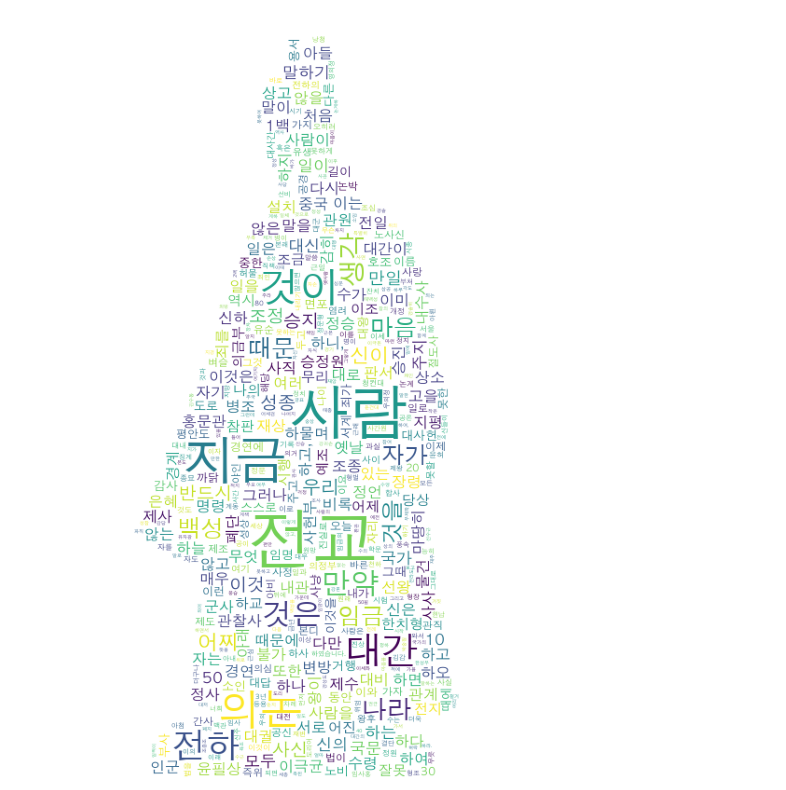

In [231]:
# 그림의 모양대로 워드클라우드 그리기
king_mask = np.array(Image.open("KingCharacter.png")) 
wc = WordCloud(font_path = '/Library/Fonts/AppleGothic.ttf',
               relative_scaling = 0.75, mask = king_mask,
               background_color = 'white',
               min_font_size = 5, 
               max_font_size = 70,
               max_words = 500,
               ).generate_from_frequencies(tmp_data)
plt.figure(figsize=(10,10))
plt.imshow(wc)
plt.axis("off")
plt.show()

# 제목으로 워드클라우드 뽑기

In [281]:
data1 = open('왕_txt/연산군일기.txt', encoding = 'utf-8').read()
data2 = []

for i in data1.split('\n'):
    for j in i.split(' '):
        data2.append(j)
data2 

# data1 = open('왕_txt/정조실록.txt', encoding = 'utf-8').read()
# data2 = []

# for i in data1.split('\n'):
#     data2.append(i)
# data2 

['이극돈',
 '등이',
 '성종의',
 '염습을',
 '정침에서',
 '집행할',
 '것을',
 '아뢰다',
 '을시에',
 '습할',
 '때',
 '백관이',
 '인정전에',
 '들어와',
 '곡하다',
 '습을',
 '마치고',
 '제사가',
 '끝나지',
 '않아',
 '세자가',
 '나가자',
 '신승선·노사신',
 '등이',
 '말리다',
 '예조',
 '판서',
 '성현이',
 '절에서',
 '제',
 '지낼지를',
 '묻자',
 '왕비가',
 '허락하다',
 '정시에',
 '소렴할',
 '때',
 '노사신·신승선·이극돈',
 '등이',
 '들어와',
 '염하고',
 '백관이',
 '곡림하다',
 '석전에',
 '백관이',
 '곡림하다',
 '예조',
 '참판',
 '송영이',
 '장생전에서',
 '왕의',
 '관곽을',
 '옮겨오다',
 '이극균·한치형',
 '등을',
 '국장',
 '도감',
 '제조로,',
 '정문형·유순',
 '등을',
 '산릉',
 '도감',
 '제조로',
 '삼다',
 '왕세자가',
 '두',
 '대비와',
 '왕비전께',
 '죽',
 '들기를',
 '청하자,',
 '승정원이',
 '먼저',
 '세자에게',
 '청하다',
 '사직과',
 '종묘와',
 '영녕전에',
 '상을',
 '고하다',
 '왕비가',
 '성복할',
 '날짜를',
 '변경하려',
 '하다가',
 '빈전',
 '도감',
 '제조',
 '이극돈의',
 '반대로',
 '그치다',
 '부모의',
 '상과',
 '임금의',
 '상이',
 '겹친',
 '유자광의',
 '입장에',
 '대하여',
 '신하들이',
 '찬반',
 '토론하다',
 '성종을',
 '위하여',
 '수륙재를',
 '올리려',
 '하자',
 '강백진·이의손이',
 '반대하여',
 '상소하다',
 '승지',
 '강귀손이',
 '태종에',
 '대한',
 '세자의',
 '호칭',
 '문제를',
 '상고할',
 '것을',
 '아뢰다',
 '윤필상·노사신·신승선·이극돈·김응기를',
 '산릉',
 '간

In [282]:
data2n = [] 
for d in data2:
    data2n.append(kkma.nouns(d))
data2n

[['이극돈'],
 ['등'],
 ['성종'],
 ['염습'],
 ['정침'],
 ['집행'],
 [],
 [],
 ['을시'],
 ['습'],
 ['때'],
 ['백관'],
 ['인정전'],
 [],
 [],
 ['습'],
 [],
 [],
 [],
 [],
 [],
 [],
 ['신승', '신승선', '선', '노사신'],
 ['등'],
 [],
 ['예조'],
 ['판서'],
 ['성현'],
 ['절'],
 ['제'],
 [],
 [],
 [],
 ['허락', '허락하다', '하다'],
 ['정시'],
 ['소렴'],
 ['때'],
 ['노사신', '신', '신승선', '승선', '이극돈'],
 ['등'],
 [],
 [],
 ['백관'],
 [],
 ['석전'],
 ['백관'],
 [],
 ['예조'],
 ['참판'],
 ['송영'],
 ['장생전'],
 ['왕'],
 ['관곽'],
 [],
 ['이극균', '한치형'],
 ['등'],
 ['국장'],
 ['도감'],
 ['제조'],
 ['정문', '정문형', '형'],
 ['등'],
 ['산릉'],
 ['도감'],
 ['제조'],
 [],
 [],
 ['두'],
 ['대비'],
 ['왕비전'],
 ['죽'],
 [],
 [],
 ['승정원'],
 [],
 ['세자'],
 [],
 ['사직'],
 ['종묘'],
 ['영녕전'],
 ['상'],
 [],
 [],
 ['성복'],
 ['날짜'],
 ['변경'],
 [],
 ['빈전'],
 ['도감'],
 ['제조'],
 ['이극돈'],
 ['반대'],
 [],
 ['부모'],
 ['상과'],
 ['임금'],
 [],
 [],
 ['유자광'],
 ['입장'],
 [],
 ['신하'],
 ['찬반'],
 ['토론', '토론하다', '하다'],
 ['성종'],
 [],
 ['수륙재'],
 [],
 ['하자'],
 ['강', '진', '이의', '이의손', '손'],
 ['반대'],
 ['상소'],
 ['승지'],
 ['강귀손'],
 ['태종'],
 [],
 ['세

In [283]:
data3n = []
for d in data2n:
    for dd in d:
        data3n.append(dd)

In [286]:
# # step3. 불용어 제거
# stop_words = open("stopwords.txt",encoding ='utf-8').read() 
# data2 = [each_word for each_word in data2
#             if each_word not in stop_words] # 불러온 단어가 모두 삭제될 때까지 for문 반복

from collections import Counter
data3 = Counter(data3n)
data4={}
for k in dict(data3):
    if len(k) >=2 | len(k) <= 10:
        data4[k] = dict(data3)[k]
data4

{'이극돈': 42,
 '성종': 56,
 '염습': 1,
 '정침': 27,
 '집행': 21,
 '을시': 1,
 '백관': 76,
 '인정전': 54,
 '신승': 72,
 '신승선': 28,
 '노사신': 170,
 '예조': 97,
 '판서': 116,
 '성현': 31,
 '허락': 86,
 '하다': 5344,
 '정시': 9,
 '소렴': 1,
 '승선': 7,
 '석전': 3,
 '참판': 47,
 '송영': 5,
 '장생전': 2,
 '관곽': 3,
 '이극균': 168,
 '한치형': 95,
 '국장': 8,
 '도감': 33,
 '제조': 83,
 '정문': 69,
 '정문형': 34,
 '산릉': 18,
 '대비': 125,
 '왕비전': 1,
 '승정원': 249,
 '세자': 23,
 '사직': 280,
 '종묘': 27,
 '영녕전': 1,
 '성복': 3,
 '날짜': 7,
 '변경': 19,
 '빈전': 21,
 '반대': 8,
 '부모': 49,
 '상과': 3,
 '임금': 57,
 '유자광': 79,
 '입장': 1,
 '신하': 41,
 '찬반': 2,
 '토론': 1,
 '수륙재': 20,
 '하자': 8,
 '이의': 90,
 '이의손': 46,
 '상소': 181,
 '승지': 299,
 '강귀손': 68,
 '태종': 5,
 '호칭': 2,
 '문제': 108,
 '상고': 73,
 '윤필상': 217,
 '김응기': 22,
 '간심사': 1,
 '심사': 1,
 '정승': 113,
 '예궐': 14,
 '전교': 380,
 '작호': 2,
 '부인': 43,
 '상복': 28,
 '백의': 2,
 '3년': 5,
 '의논': 384,
 '수라': 3,
 '불사': 5,
 '폐해': 13,
 '홍문관': 197,
 '부제학': 67,
 '성세명': 25,
 '서계': 102,
 '모친상': 6,
 '국상': 12,
 '표연말': 30,
 '연말': 30,
 '권주': 21,
 '불재': 2,
 '수찬': 7,
 '

In [272]:
# del tmp_data['하다'] 
# del tmp_data['윤필상'] 

In [287]:
# step4. 단어 별 빈도수 집계하기 
data5 = Counter(data4) 
data6 = data5.most_common(200) # 가장 많이 언급된 100개만 보기 
tmp_data = dict(data6) 
tmp_data

{'하다': 5344,
 '대간': 759,
 '국문': 410,
 '의논': 384,
 '전교': 380,
 '내관': 327,
 '경연': 313,
 '관직': 308,
 '제수': 308,
 '승지': 299,
 '사직': 280,
 '승정원': 249,
 '사람': 245,
 '일로': 237,
 '건의': 235,
 '지평': 233,
 '처벌': 227,
 '장령': 219,
 '윤필상': 217,
 '등에': 205,
 '태백성': 200,
 '홍문관': 197,
 '대내': 190,
 '상소': 181,
 '내수사': 171,
 '노사신': 170,
 '이극균': 168,
 '대궐': 163,
 '주지': 161,
 '정언': 154,
 '면포': 149,
 '사냥': 145,
 '대사헌': 133,
 '이세': 128,
 '잔치': 128,
 '사신': 126,
 '대비': 125,
 '잘못': 125,
 '중국': 125,
 '토산물': 124,
 '하사': 123,
 '관찰사': 118,
 '일과': 118,
 '관원': 117,
 '죄인': 117,
 '판서': 116,
 '의정부': 116,
 '병조': 116,
 '합사': 114,
 '정승': 113,
 '부당': 111,
 '문제': 108,
 '이자': 104,
 '철거': 103,
 '이세좌': 103,
 '물품': 103,
 '서계': 102,
 '야인': 102,
 '가자': 101,
 '임사': 101,
 '임사홍': 101,
 '의금부': 99,
 '예조': 97,
 '어제': 97,
 '평안도': 96,
 '곤장': 96,
 '한치형': 95,
 '금표': 95,
 '제사': 93,
 '각도': 93,
 '내용': 92,
 '이의': 90,
 '대군': 90,
 '진상': 88,
 '1백': 88,
 '조참': 88,
 '대사간': 87,
 '허락': 86,
 '유생': 86,
 '50': 86,
 '대신': 85,
 '불가': 84,
 '부사': 84,
 '제조': 8

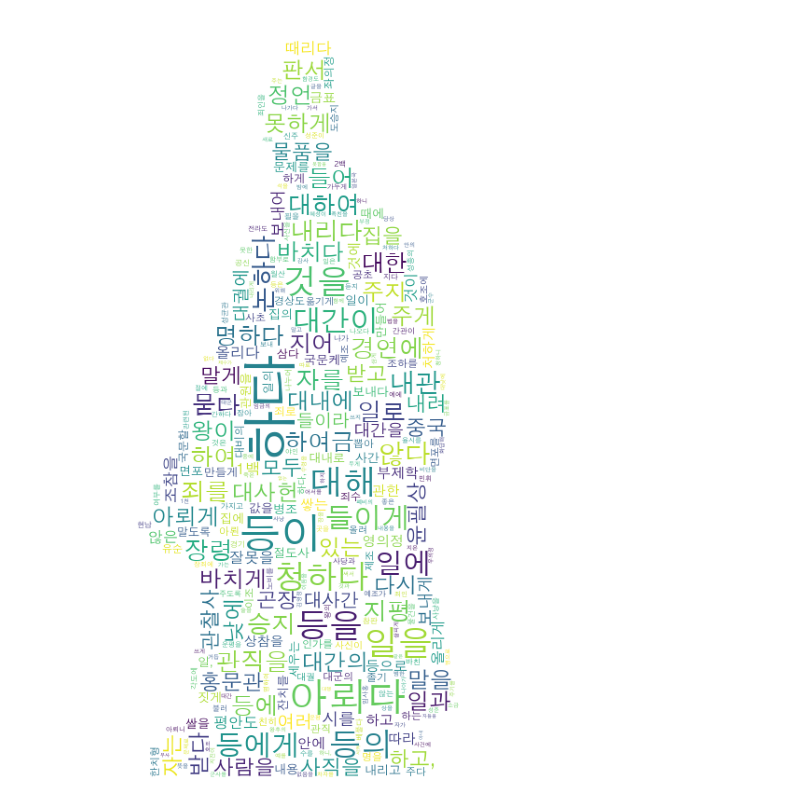

In [280]:
# 그림의 모양대로 워드클라우드 그리기
king_mask = np.array(Image.open("KingCharacter.png")) 
wc = WordCloud(font_path = '/Library/Fonts/AppleGothic.ttf',
               relative_scaling = 0.375, 
               mask = king_mask,
               background_color = 'white',
               min_font_size = 3, 
               max_font_size = 60,
               max_words = 500,
               ).generate_from_frequencies(tmp_data)
plt.figure(figsize=(10,10))
plt.imshow(wc)
plt.axis("off")
plt.show()

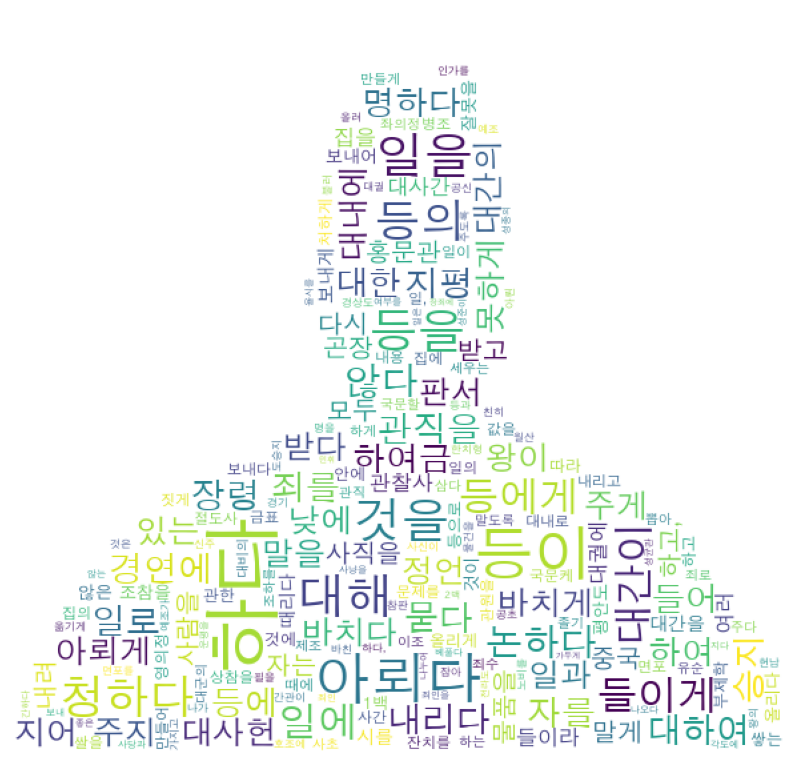

In [274]:
# 그림의 모양대로 워드클라우드 그리기
king_mask = np.array(Image.open("대왕세종.png")) 
wc = WordCloud(font_path = '/Library/Fonts/AppleGothic.ttf',
               relative_scaling = 0.375, 
               mask = king_mask,
               background_color = 'white',
               min_font_size = 3, 
               max_font_size = 60,
               max_words = 500,
               ).generate_from_frequencies(tmp_data)
plt.figure(figsize=(10,10))
plt.imshow(wc)
plt.axis("off")
plt.show()